### 1. Data Import and Preprocessing
- mount drive w/ stellar data
- variable initilization:
  - data encoded and synthetically modified in seperate script
  - randomized training and test sets (75%-25% spilt)
  - normalize data

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Read in data, create train/test splits (path for each set along feature name syntax may differ)

#file_path = "/content/drive/MyDrive/EC503 Final Project/Datasets/encoded_SMOTE_dataset.csv" ##SMOTE
#file_path = "/content/drive/MyDrive/EC503 Final Project/Datasets/MK csv #3.csv" ##MK3
file_path = "/content/drive/MyDrive/EC503 Final Project/Datasets/MK csv #2.csv" ##MK2
# file_path = "/content/drive/MyDrive/EC503 Final Project/Datasets/MK csv #1.csv" ##MK1 aka ORIGINAL
#file_path = "/content/drive/MyDrive/EC503 Final Project/Datasets/Artificial Data Method 1.xlsx" ##ART1
#file_path = "/content/drive/MyDrive/EC503 Final Project/Datasets/Artificial Data Method 2.xlsx" ##ART2

# df = pd.read_excel(file_path) #for .csv
df = pd.read_csv(file_path) #for excel

#X = df[['Temperature (K)', 'Luminosity (L/L0)', 'Radius (R/R0)', 'Absolute Magnitude', 'Star Color']] ## ART1 ART2
# X = df[['Temperature (K)', 'Luminosity (L/L0)', 'Radius (R/R0)', 'Absolute Magnitude', 'Star Color']] ##SMOTE
X = df[['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)', 'Color']] ##MK1
Y = df['Spectral Class']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [ ]:
# Normalize data

scaler = StandardScaler()
# continuous_features = ['Temperature (K)', 'Luminosity (L/L0)', 'Radius (R/R0)', 'Absolute Magnitude']  # ART, SMOTE
continuous_features = ['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)'] #MK SETS

X_train[continuous_features] = scaler.fit_transform(X_train[continuous_features])
X_test[continuous_features] = scaler.transform(X_test[continuous_features])


###2. Train and Evaluate Model
- Parameter (kernel) and hyperparameter (C, gamma) tuning for choosing optimal values
- Evaluate model performance via cross validation

In [ ]:
# Initialize the SVM classifier
svm_model = SVC(kernel='linear', random_state=42)

# Train the model on the training data
svm_model.fit(X_train, y_train)

In [ ]:
# Test model performance
y_pred = svm_model.predict(X_test)

# Print the confusion matrix
print(confusion_matrix(y_test, y_pred))

# Print classification report
print(classification_report(y_test, y_pred))

In [ ]:
# Set the parameters by cross-validation

param_grid = [
    {'C': [0.1, 1, 10, 100], 'kernel': ['linear']},
    {'C': [0.1, 1, 10, 100], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
    # Add more kernels and their specific parameters here if needed
]

# Create a classifier with the parameter candidates
clf = GridSearchCV(estimator=SVC(), param_grid=param_grid, scoring='accuracy', cv=5, verbose=1)

# Train the classifier on training set
clf.fit(X_train, y_train)

# View the accuracy score
print('Best score for training data:', clf.best_score_)

# View the best parameters for the model found using grid search
print('Best C:',clf.best_estimator_.C)
print('Best Kernel:',clf.best_estimator_.kernel)
print('Best Gamma:',clf.best_estimator_.gamma)

In [ ]:
# Retrain and test with optimal paramters

# Initialize the SVM classifier with the optimal parameters
optimal_svm = SVC(C=100, kernel='linear', gamma='scale', random_state=42)

# Train the model on the full training data
optimal_svm.fit(X_train, y_train)

In [ ]:
# Predict the labels on the test set
y_pred = optimal_svm.predict(X_test)

# Evaluate the predictions using confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Accuracy on test data:", accuracy_score(y_test, y_pred))

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Define the stratified k-fold cross-validator
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Classifier with the optimal parameters found previously
classifier = SVC(C=100, kernel='linear', gamma='scale', random_state=42)

# Calculate the cross-validated scores
scores = cross_val_score(classifier, X, Y, cv=skf, scoring='accuracy')

In [ ]:
print("Cross-validated scores:", scores)
print("Average cross-validated score:", scores.mean())
print("Standard deviation of scores:", scores.std())

###EXTRA
- Code to create bucket histograms to visualize full project results
- CCR, F1 Histograms
- Statistical Analysis of Origninal Dataset

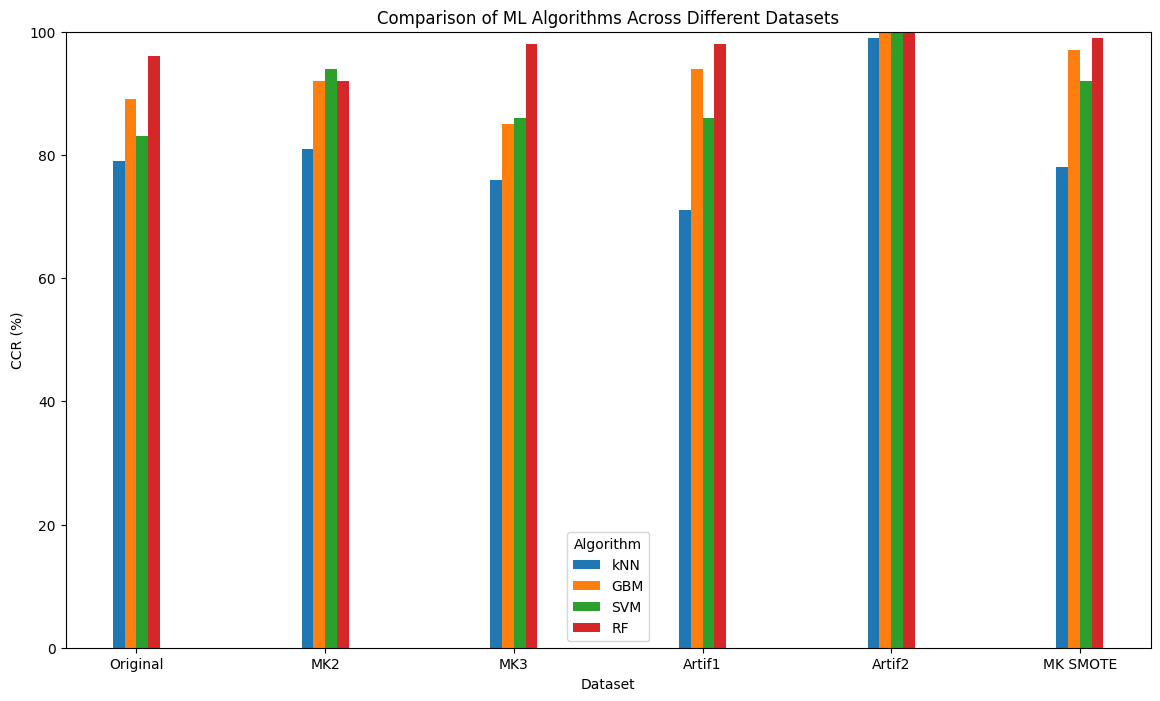

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# data: CCRs of different algorithms on multiple datasets
data = {
    'Dataset': ['Original', 'MK2', 'MK3', 'Artif1', 'Artif2', 'MK SMOTE'],
    'kNN': [79, 81, 76, 71, 99, 78],
    'GBM': [89, 92, 85, 94, 99.8, 97],
    'SVM': [83, 94, 86, 86, 100, 92],
    'RF': [96, 92, 98, 98, 100, 99] ## Enter values manually
}

# Creating DataFrame
df = pd.DataFrame(data)

# Setting the index to 'Dataset'
df.set_index('Dataset', inplace=True)

# Plotting
ax = df.plot(kind='bar', figsize=(14, 8), width=0.25)  # Adjust width here
ax.set_ylabel('CCR (%)')
ax.set_title('Comparison of ML Algorithms Across Different Datasets')
ax.set_ylim(0, 100)  # Adjust the y-axis limits
plt.xticks(rotation=0)  # Keeps dataset labels horizontal
plt.legend(title='Algorithm')

# Show the plot
plt.show()



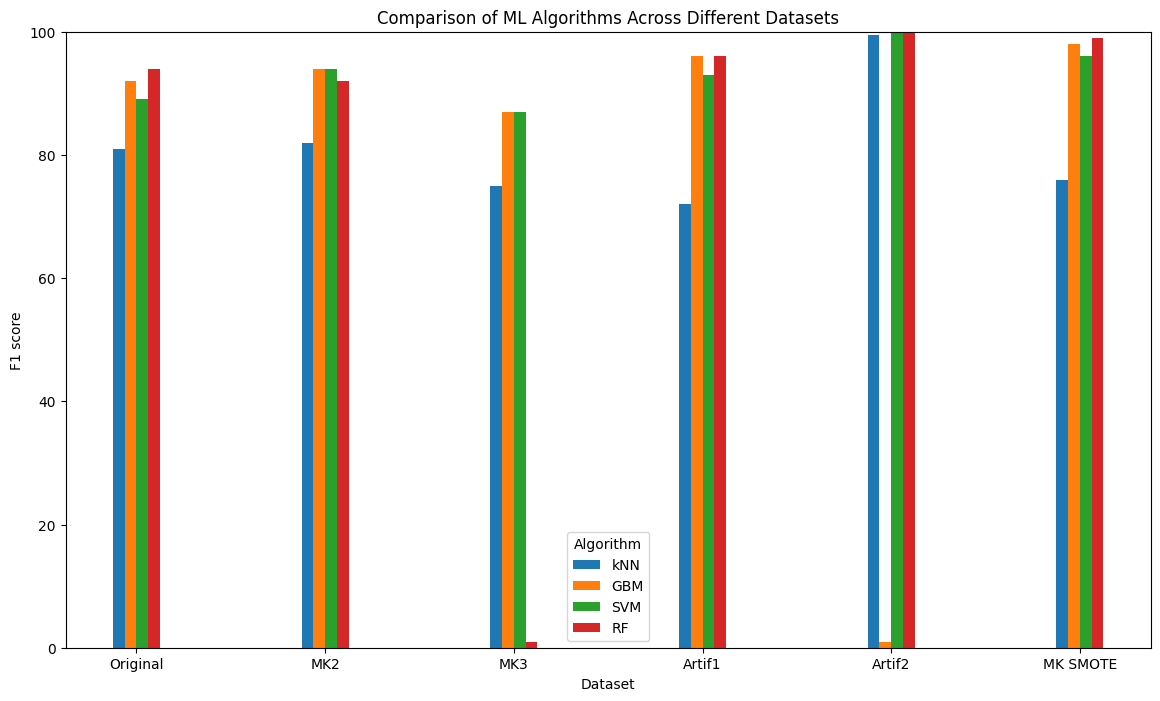

In [ ]:
# data: f1 scores of different algorithms on multiple datasets
data = {
    'Dataset': ['Original', 'MK2', 'MK3', 'Artif1', 'Artif2', 'MK SMOTE'],
    'kNN': [81, 82, 75, 72, 99.5, 76],
    'GBM': [92, 94, 87, 96, 1, 98],
    'SVM': [89, 94, 87, 93, 100, 96],
    'RF': [94, 92, 1, 96, 100, 99] ## Enter values manually
}

# Creating DataFrame
df = pd.DataFrame(data)

# Setting the index to 'Dataset'
df.set_index('Dataset', inplace=True)

# Plotting
ax = df.plot(kind='bar', figsize=(14, 8), width=0.25)  # Adjust width here
ax.set_ylabel('F1 score')
ax.set_title('Comparison of ML Algorithms Across Different Datasets')
ax.set_ylim(0, 100)  # Adjust the y-axis limits
plt.xticks(rotation=0)  # Keeps dataset labels horizontal
plt.legend(title='Algorithm')

# Show the plot
plt.show()

In [ ]:

file_path = "/content/drive/MyDrive/EC503 Final Project/Datasets/MK csv #1.csv"

# Load your dataset
data = pd.read_csv(file_path)

# Select the desired features
selected_features = data[['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)', 'Star type']]

# Compute the correlation matrix
correlation_matrix = selected_features.corr()

# Print the correlation matrix
print(correlation_matrix)
